In [13]:
import numpy as np
import matplotlib as plt
from datascience import*
%matplotlib inline 
plt.style.use('fast')

In [14]:
# cm_1 = omega * 29979245800 (1/sec)
# Kb = 1.380649e-23 (J/K)
# reduced mass uAB =  is ( ( 18.9984*2.0158) / (18.9984+2.0158) ) amu switch to Kg
# h is 6.62607015×10−34 Js
# Hbar = 1.054571817×10−34 Js
# sqaure angrum to square A2 * 1.0E-20 to m2 for moment of inertia 
# end multiply 10**6 to get proper units
# kcal * 4184 to get J

In [189]:
def reaction_rate (T):
    h = 6.62607015e-34
    uAB = ( ( 18.9984*2.0158) / (18.9984+2.0158) ) * 1.66054e-27
    Kb = 1.380649e-23
    qtrans_dagger = 1
    qtransAB =  (1 / (h**3) ) * (2*np.pi*uAB*Kb*T)**(3/2)
    qtrans_factor = qtrans_dagger/qtransAB
    omega_daggerE1 = 397.9*29979245800
    omega_daggerA1 = 4007.6*29979245800
    omega_H2 = 4400*29979245800
    hbar = 6.62607015e-34
    q_vib_daggerE1 = np.exp( (-hbar*omega_daggerE1) / (2*Kb*T)) / (1 - (np.exp( (-hbar*omega_daggerE1) / (Kb*T))) )
    q_vib_daggerA1 = np.exp( (-hbar*omega_daggerA1) / (2*Kb*T)) / (1 - (np.exp( (-hbar*omega_daggerA1) / (Kb*T))) )
    q_vib_H2 = np.exp( (-hbar*omega_H2) / (2*Kb*T)) / (1 - (np.exp( (-hbar*omega_H2) / (Kb*T))) )
    q_vib_factor = (q_vib_daggerE1*q_vib_daggerE1*q_vib_daggerA1) / (q_vib_H2)
    I_dagger = 7.433*1e-20
    I_H2 =  0.277*1e-20
    sigma_dagger = 1
    sigma_H2 = 2
    q_rot_dagger = (8 * (np.pi**2) * I_dagger * Kb * T) / (sigma_dagger*h*h)
    q_rot_H2 = (8 * (np.pi**2) * I_H2 * Kb * T) / (sigma_H2*h*h)
    q_rot_factor = q_rot_dagger/q_rot_H2
    delta = 404*29979245800
    electronic_factor = 2 /( 4 + (2 * np.exp( -delta / Kb*T ) ) )
    E_dagger = 0.9 * 4184 
    exponential_factor = np.exp (- E_dagger / (Kb*T*6.022e23) ) 
    KbTh = Kb*T / h
    return q_vib_factor*qtrans_factor*q_rot_factor*0.466*exponential_factor*KbTh*10e5


In [190]:
print(reaction_rate(300))

7.535077796067496e-12


In [157]:
# h2+f reaction rate at 300
H2_at_300 = reaction_rate(300)
H2_at_300

7.535077796067496e-12

In [158]:
Temperature = np.linspace(200,500,50)

In [159]:
InverseTemp = 1/Temperature

In [160]:
Rate = []
for T in Temperature:
    Rate.append(reaction_rate(T))

In [161]:
logK = np.log(Rate)

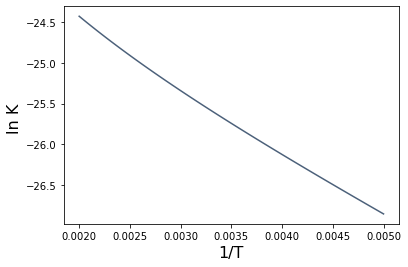

In [162]:
Table().with_columns("1/T",InverseTemp,"ln K ", logK).plot(0)

In [163]:
# calculate slope
x = InverseTemp
y = logK
slope, intercept = np.polyfit(x,y,1)
print(slope)

-810.588829554955


3765.6

In [145]:
# slope = -Ea/R so to get Ea you do -slope*8.314
Ea = -slope*8.314
Ea

6739.235528919897

In [166]:
def reaction_rate_D2 (T):
    h = 6.62607015e-34
    uAB = ( ( 18.9984*4.0282) / (18.9984+4.0282) ) * 1.66054e-27
    Kb = 1.380649e-23
    qtrans_dagger = 1
    qtransAB =  (1 / (h**3) ) * (2*np.pi*uAB*Kb*T)**(3/2)
    qtrans_factor = qtrans_dagger/qtransAB
    omega_daggerE1 =  282*29979245800
    omega_daggerA1 =  2835.1*29979245800
    omega_D2 =  3115.50*29979245800
    hbar = 6.62607015e-34
    q_vib_daggerE1 = np.exp( (-hbar*omega_daggerE1) / (2*Kb*T)) / (1 - (np.exp( (-hbar*omega_daggerE1) / (Kb*T))) )
    q_vib_daggerA1 = np.exp( (-hbar*omega_daggerA1) / (2*Kb*T)) / (1 - (np.exp( (-hbar*omega_daggerA1) / (Kb*T))) )
    q_vib_D2 = np.exp( (-hbar*omega_D2) / (2*Kb*T)) / (1 - (np.exp( (-hbar*omega_D2) / (Kb*T))) )
    q_vib_factor = (q_vib_daggerE1*q_vib_daggerE1*q_vib_daggerA1) / (q_vib_D2)
    I_dagger = 13.606*1e-20
    I_D2 =  0.554*1e-20
    sigma_dagger = 1
    sigma_D2 = 2
    q_rot_dagger = (8 * (np.pi**2) * I_dagger * Kb * T) / (sigma_dagger*h*h)
    q_rot_D2 = (8 * (np.pi**2) * I_D2 * Kb * T) / (sigma_D2*h*h)
    q_rot_factor = q_rot_dagger/q_rot_D2
    delta = 404*29979245800
    electronic_factor = 2 /( 4 + (2 * np.exp( -delta / Kb*T ) ) )
    E_dagger = 0.9 * 4184 
    exponential_factor = np.exp (- E_dagger / (Kb*T*6.022e23) ) 
    KbTh = Kb*T / h
    return q_vib_factor*qtrans_factor*q_rot_factor*0.466*exponential_factor*KbTh*10e5

In [167]:
D2_at_300 = reaction_rate_D2(300)
D2_at_300

4.9250252451660794e-12

In [168]:
# ratio
# H2/D2
H2_D2 = H2_at_300/D2_at_300
H2_D2

1.5299571922932145